In [27]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
#from matplotlib.ticker import FuncFormatter

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug = "../Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial = "../Pymaceuticals/data/clinicaltrial_data.csv"


In [28]:
# Read the Mouse  Data
mouse_drug = pd.read_csv(mouse_drug)
#mouse_drug.head()

In [29]:
# Read the Clinical Trial Data
clinical_trial = pd.read_csv(clinical_trial)
#clinical_trial.head()

In [30]:
# Combine the data into a single dataset
merged_df = pd.merge(clinical_trial, mouse_drug, how='inner')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_mean = merged_df.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
group_mean = pd.DataFrame(group_mean)
#Delete unnecessary column
group_mean = group_mean.drop(columns="Metastatic Sites")
#group_mean.head(5)
#Reset dataframe index 
group_df = group_mean.reset_index()
# Preview DataFrame
group_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_error_df = merged_df.groupby(["Drug", "Timepoint"]).sem()
#Delete unnecessary column
st_error_df = st_error_df.drop(columns=["Metastatic Sites", "Mouse ID"]).reset_index()
# Preview DataFrame
st_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [34]:
# Minor Data Munging to Re-Format the Data Frames
st_error_df = st_error_df.pivot('Timepoint', 'Drug','Tumor Volume (mm3)')
# Preview that Reformatting worked
st_error_df.head(5)                    

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [36]:
# Minor Data Munging to Re-Format the Data Frames
group_df = group_df.pivot('Timepoint', 'Drug','Tumor Volume (mm3)')
# Preview that Reformatting worked
group_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


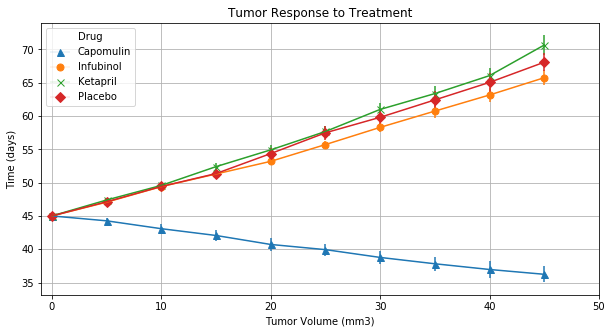

In [53]:
# Generate the Plot (with Error Bars)
ax = group_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(10,5), yerr = st_error_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]], legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
group_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(10,5), style=['^-', 'o--', 'x-.', 'D-'], linestyle='--', markersize=7, grid="on" , linewidth=0.2, ax = ax)
plt.xlim(-1, 50)
plt.title("Tumor Response to Treatment")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time (days)")
plt.show()

## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df = merged_df.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
metastatic_df = pd.DataFrame(metastatic_df)
#Delete unnecessary column
metastatic_df = metastatic_df.drop(columns="Tumor Volume (mm3)").reset_index()
# Preview DataFrame
metastatic_df.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [40]:
# Minor Data Munging to Re-Format the Data Frame
metastatic_df = metastatic_df.pivot('Timepoint', 'Drug','Metastatic Sites')
# Preview that Reformatting worked
metastatic_df.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error_df = merged_df.groupby(["Drug", "Timepoint"]).sem()
#Delete unnecessary column
met_error_df = met_error_df.drop(columns=["Tumor Volume (mm3)", "Mouse ID"]).reset_index()
# Preview DataFrame
met_error_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [42]:
# Minor Data Munging to Re-Format the Data Frames
st_met_error = met_error_df.pivot('Timepoint', 'Drug','Metastatic Sites')
# Preview that Reformatting worked
st_met_error.head(5) 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


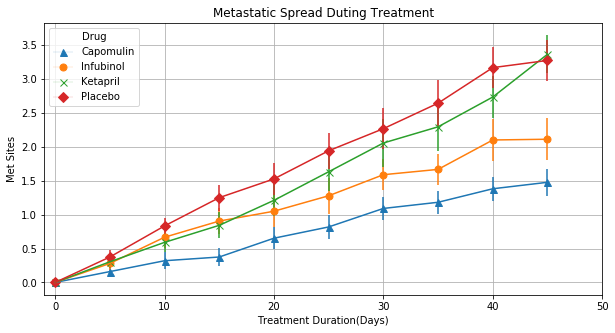

In [52]:
# Generate the Plot (with Error Bars)
ax = metastatic_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(10,5), yerr = st_met_error[["Capomulin", "Infubinol", "Ketapril", "Placebo"]], legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
metastatic_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(10,5), style=['^-', 'o--', 'x-.', 'D-'], linestyle='--', markersize=7, linewidth=0.2, grid="on", ax = ax)
plt.xlim(-1,50) 
plt.title("Metastatic Spread Duting Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met Sites")
plt.show()

## Survival Rates

In [44]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = merged_df.groupby(["Drug", "Timepoint"]).count()
#Delete unnecessary column
mouse_count = mouse_count.drop(columns=["Tumor Volume (mm3)", "Metastatic Sites"]).reset_index()
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [45]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.pivot('Timepoint', 'Drug','Mouse ID')
#mouse_count = mouse_count.drop(columns=["Naftisol", "Ceftamin", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
# Preview that Reformatting worked
mouse_count.head(5) 
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [46]:
survival_rate = round(mouse_count.apply(lambda x: (x/x[0])*100),3)
survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000,100.0,100.000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.154,100.0,96.154,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.462,96.0,88.462,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.385,96.0,88.462,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.385,92.0,80.769,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846,92.0,73.077,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000,92.0,69.231,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.462,84.0,61.538,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615,80.0,46.154,56.0


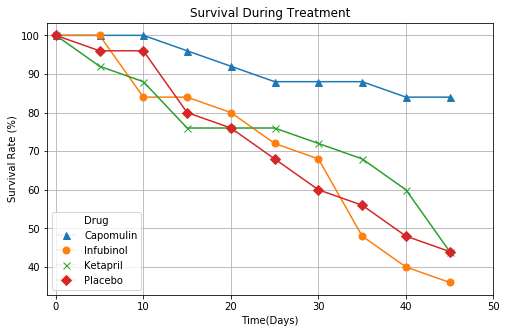

In [47]:
# Generate the Plot (Accounting for percentages)
ax = survival_rate[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(8,5), legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
# Sets the y limits of the current chart
survival_rate[["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot(figsize=(8,5), style=['^-', 'o--', 'x-.', 'D-'], linestyle='--', markersize=7, linewidth=0.2, grid="on", ax = ax)
plt.xlim(-1, 50)
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
# Show the Figure
plt.show()

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
percent_change = round((((group_df.iloc[-1]-group_df.iloc[0])/group_df.iloc[0])*100), 2)
# Display the data to confirm
percent_change


Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
dtype: float64

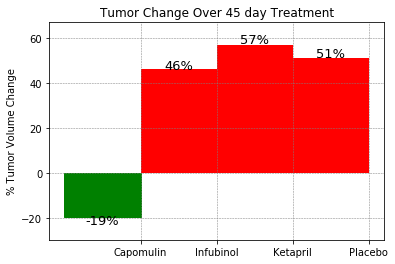

In [51]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 1      # the width of the bars

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)


yvals = [-19.48, 46.12, 57.03, 51.30]

rects1 = ax.bar(ind, yvals, width, color='r')

ax.set_ylabel('% Tumor Volume Change')
ax.set_title("Tumor Change Over 45 day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels( ("Capomulin", "Infubinol", "Ketapril", "Placebo") )

plt.ylim(min(yvals)-10, max(yvals)+10)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d%%'%int(h),
                ha='center', va='center_baseline', fontsize=13) 
autolabel(rects1)
rects1[0].set_color('g') 
plt.grid(color='grey', linestyle='--', linewidth=0.5, which="major")

In [50]:
# plt.savefig("../Images/pymauceuticals.png")
# plt.show()

<Figure size 432x288 with 0 Axes>